In [1]:
# Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import skew # Çarpıklık hesaplamak için

# Ayarlar
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Veri Yükleme
# Karakter problemi için utf-8-sig formatı kullanılıyor.
try:
    df = pd.read_csv("muhendislik_ogrenci_veriseti.csv", encoding="utf-8-sig") # [Kullanıcının Notu]
    print("Veri başarıyla yüklendi.")
except FileNotFoundError:
    print("HATA: 'muhendislik_ogrenci_veriseti.csv' dosyası bulunamadı. Lütfen dosya adını kontrol edin.")
    # df = pd.DataFrame()
    # raise

Veri başarıyla yüklendi.


In [2]:
# İlk 5 satırı görüntüleme
print("--- İlk 5 Satır ---")
print(df.head())

# Sütun tiplerini ve eksik olmayan değer sayısını kontrol etme 
print("\n--- Veri Seti Bilgileri (Sütun Tipleri, Non-Null Sayısı) ---")
df.info()

# Temel özet istatistikleri (sayısal sütunlar için) 
print("\n--- Temel Özet İstatistikleri (describe) ---")
print(df.describe().T)

--- İlk 5 Satır ---
     OgrenciNo                    Bolum            Lise  YGS_Puani  YGS_Tercih_Sirasi Ikametgah  Mezuniyet_Notu
0  20251101001  Bilgisayar Mühendisliği        Düz Lise     470.79               12.0      Yurt           76.34
1  20251102002      Makine Mühendisliği  Anadolu Lisesi     429.03                3.0       NaN           96.28
2  20251101003  Bilgisayar Mühendisliği        Düz Lise     462.27               10.0      Yurt           75.19
3  20251101004  Bilgisayar Mühendisliği        Düz Lise     483.42                NaN        Ev           87.21
4  20251102005      Makine Mühendisliği        Düz Lise        NaN                NaN        Ev           84.51

--- Veri Seti Bilgileri (Sütun Tipleri, Non-Null Sayısı) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OgrenciNo          1000 non-null   int64

In [3]:
# Sütun bazında eksik değer sayısını hesaplama 
missing_counts = df.isnull().sum()

# Sütun bazında eksik değer oranını hesaplama 
missing_ratios = (df.isnull().sum() / len(df)) * 100

# Sonuçları DataFrame olarak birleştirme
missing_info = pd.DataFrame({
    'Eksik Sayısı': missing_counts,
    'Eksik Oranı (%)': missing_ratios
})

# Sadece eksik verisi olan sütunları gösterme
missing_info = missing_info[missing_info['Eksik Sayısı'] > 0].sort_values(by='Eksik Oranı (%)', ascending=False)

print("--- Eksik Veri Analizi ---")
print(missing_info)

--- Eksik Veri Analizi ---
                   Eksik Sayısı  Eksik Oranı (%)
YGS_Tercih_Sirasi           105             10.5
Lise                        104             10.4
Ikametgah                    83              8.3
Mezuniyet_Notu               81              8.1
YGS_Puani                    77              7.7


In [4]:
# Sadece sayısal sütunları seçme 
numerical_cols = df.select_dtypes(include=np.number).columns

print("--- Betimsel İstatistikler ---")

# Merkezi Eğilim Ölçüleri (Ortalama, Medyan, Mod) 
mean_vals = df[numerical_cols].mean()
median_vals = df[numerical_cols].median()
mode_vals = df[numerical_cols].mode().iloc[0] # İlk modu al

central_tendency = pd.DataFrame({
    'Ortalama': mean_vals,
    'Medyan': median_vals,
    'Mod': mode_vals
})
print("\n[Merkezi Eğilim Ölçüleri]")
print(central_tendency.T)

# Yayılım Ölçüleri (Varyans, Standart Sapma, IQR) 
variance_vals = df[numerical_cols].var()
std_vals = df[numerical_cols].std()
iqr_vals = df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)

dispersion = pd.DataFrame({
    'Varyans': variance_vals,
    'Std. Sapma': std_vals,
    'IQR': iqr_vals
})
print("\n[Yayılım Ölçüleri]")
print(dispersion.T)

# Şekil Ölçüsü (Çarpıklık - Skewness) 
skewness_vals = df[numerical_cols].apply(lambda x: skew(x.dropna())) # NaN değerleri düşürerek hesapla

skewness = pd.DataFrame({'Çarpıklık (Skewness)': skewness_vals})
print("\n[Şekil Ölçüsü]")
print(skewness.T)

--- Betimsel İstatistikler ---

[Merkezi Eğilim Ölçüleri]
             OgrenciNo   YGS_Puani  YGS_Tercih_Sirasi  Mezuniyet_Notu
Ortalama  2.043336e+10  404.014431           7.900559       78.569445
Medyan    2.025110e+10  408.760000           8.000000       78.740000
Mod       2.025110e+10  422.000000           9.000000      100.000000

[Yayılım Ölçüleri]
               OgrenciNo    YGS_Puani  YGS_Tercih_Sirasi  Mezuniyet_Notu
Varyans     3.321868e+19  2257.340426          17.991219      133.672969
Std. Sapma  5.763565e+09    47.511477           4.241606       11.561703
IQR         2.408750e+03    68.720000           7.000000       15.870000

[Şekil Ölçüsü]
                      OgrenciNo  YGS_Puani  YGS_Tercih_Sirasi  Mezuniyet_Notu
Çarpıklık (Skewness)  31.575323  -0.377154            0.00889       -0.148398


In [5]:
# Object (kategorik) tipindeki sütunlarda boş stringleri (varsa) NaN'e dönüştürme
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace({'': np.nan, ' ': np.nan})

print("Boş stringler NaN'e dönüştürüldü. Eksik veri sayısını tekrar kontrol edelim:")
print(df.isnull().sum())

Boş stringler NaN'e dönüştürüldü. Eksik veri sayısını tekrar kontrol edelim:
OgrenciNo              0
Bolum                  0
Lise                 104
YGS_Puani             77
YGS_Tercih_Sirasi    105
Ikametgah             83
Mezuniyet_Notu        81
dtype: int64


In [6]:
# Kategorik ve Sayısal Sütunları Ayırma
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Kategorik Veriler için İmputasyon (Mod ile) 
# Kategorik sütunlarda eksik varsa
if not categorical_cols[df[categorical_cols].isnull().any()].empty:
    cat_imputer = SimpleImputer(strategy='most_frequent') # Mod
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Sayısal Veriler için İmputasyon (Medyan veya Ortalama ile) 
# Eksik veri analizine göre Medyan (aykırı değerlere daha dayanıklı) tercih edilebilir.
if not numerical_cols[df[numerical_cols].isnull().any()].empty:
    num_imputer = SimpleImputer(strategy='median') # Medyan
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

print("\n--- İmputasyon Sonrası Eksik Veri Kontrolü ---")
print(df.isnull().sum().sum()) # Toplam eksik veri kontrolü (0 olmalı)


--- İmputasyon Sonrası Eksik Veri Kontrolü ---
0


In [7]:
# Kategorik sütunları (nominal/sırasız) One-Hot Encoding ile dönüştürme 
# 'drop_first=True' dummy değişken tuzağından kaçınmak için kullanılabilir.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- One-Hot Encoding Sonrası DataFrame'in İlk 5 Satırı ---")
print(df_encoded.head())
print(f"Orijinal sütun sayısı: {len(df.columns)}, Yeni sütun sayısı: {len(df_encoded.columns)}")


--- One-Hot Encoding Sonrası DataFrame'in İlk 5 Satırı ---
      OgrenciNo  YGS_Puani  YGS_Tercih_Sirasi  Mezuniyet_Notu  Bolum_Elektrik Mühendisliği  Bolum_Gıda Mühendisliği  Bolum_Harita Mühendisliği  Bolum_Makine Mühendisliği  Lise_Düz Lise  Lise_Fen Lisesi  Lise_Meslek Lisesi  Ikametgah_Yurt  Ikametgah_Özel Yurt
0  2.025110e+10     470.79               12.0           76.34                        False                    False                      False                      False           True            False               False            True                False
1  2.025110e+10     429.03                3.0           96.28                        False                    False                      False                       True          False            False               False            True                False
2  2.025110e+10     462.27               10.0           75.19                        False                    False                      False                     

In [8]:
# Ölçekleme için sadece dönüştürülmemiş (orijinal) sayısal sütunları seçme
cols_to_scale = [col for col in numerical_cols if col in df_encoded.columns]

# MinMaxScaler kullanımı 
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

print("\n--- MinMaxScaler Sonrası Sayısal Sütunların İlk 5 Satırı ---")
print(df_encoded[cols_to_scale].head())


--- MinMaxScaler Sonrası Sayısal Sütunların İlk 5 Satırı ---
      OgrenciNo  YGS_Puani  YGS_Tercih_Sirasi  Mezuniyet_Notu
0  0.000000e+00   0.896174           0.785714        0.586941
1  5.492156e-09   0.713152           0.142857        0.935056
2  1.097333e-11   0.858833           0.642857        0.566865
3  1.646000e-11   0.951527           0.500000        0.776711
4  5.508616e-09   0.624315           0.500000        0.729574


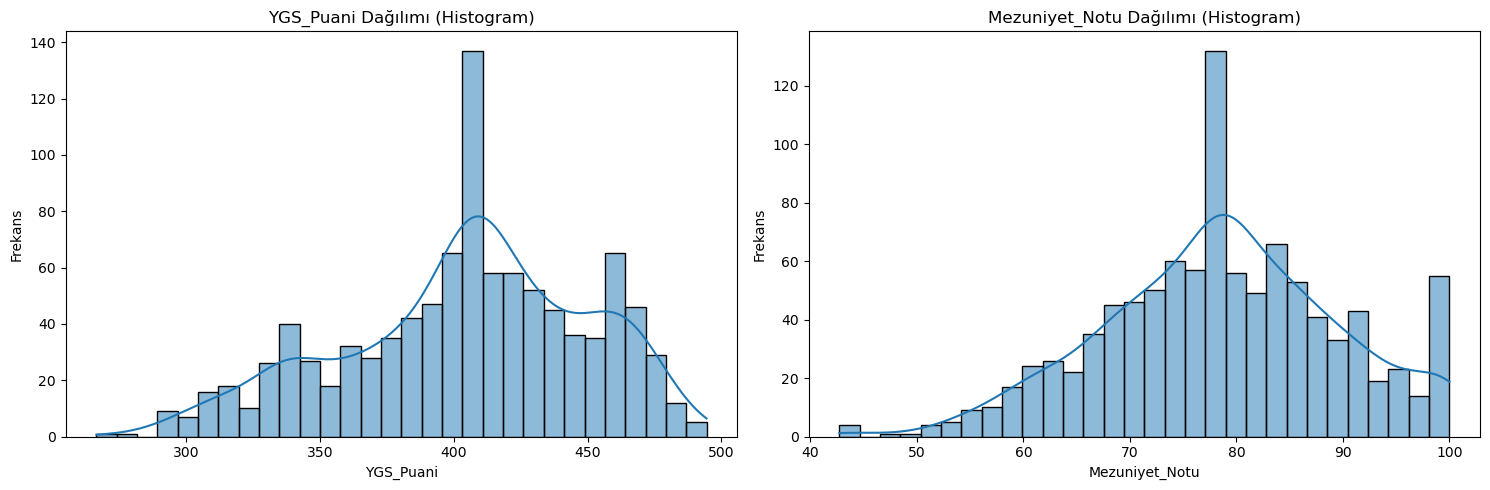

In [9]:
plt.figure(figsize=(15, 5))

# YGS_Puani Histogramı
plt.subplot(1, 2, 1)
sns.histplot(df['YGS_Puani'], kde=True, bins=30)
plt.title('YGS_Puani Dağılımı (Histogram)')
plt.xlabel('YGS_Puani')
plt.ylabel('Frekans')

# Mezuniyet_Notu Histogramı
plt.subplot(1, 2, 2)
sns.histplot(df['Mezuniyet_Notu'], kde=True, bins=30)
plt.title('Mezuniyet_Notu Dağılımı (Histogram)')
plt.xlabel('Mezuniyet_Notu')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

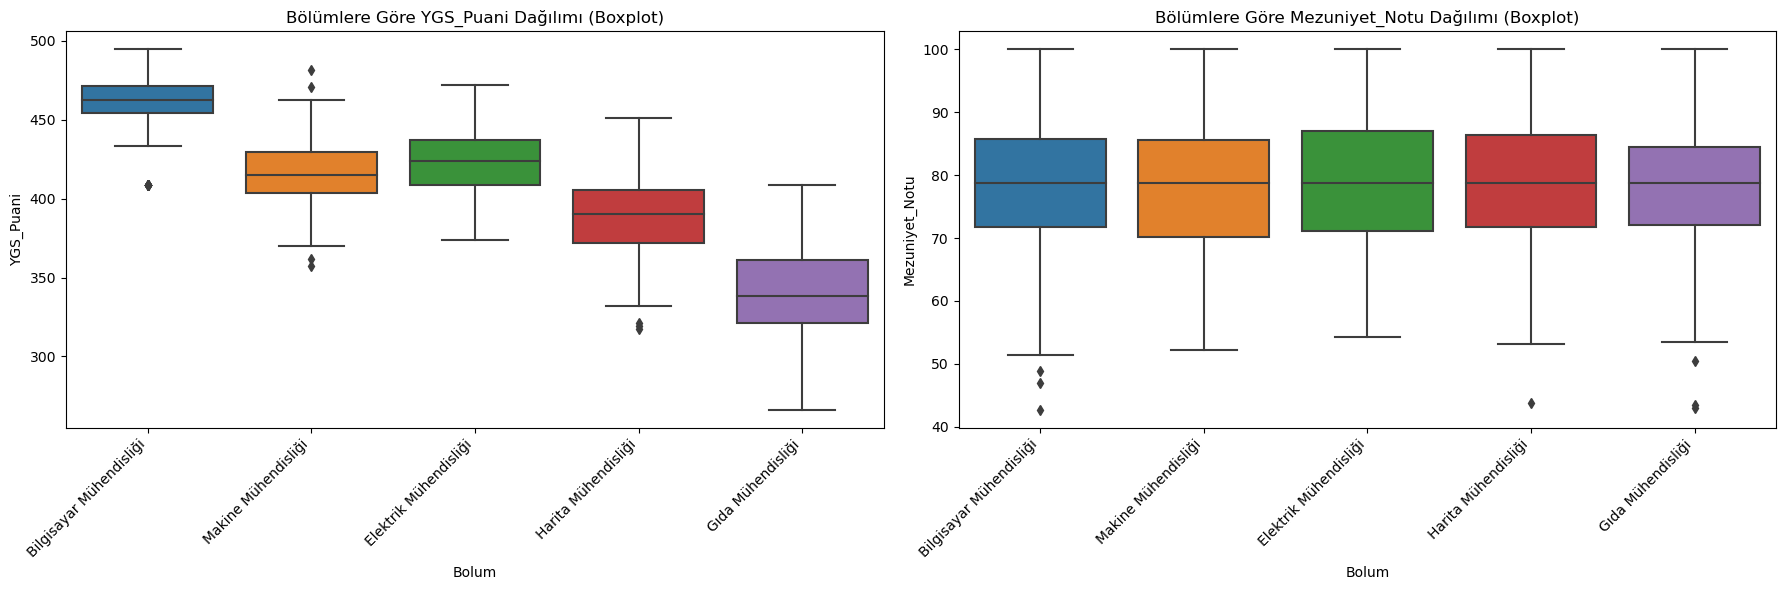

In [10]:
plt.figure(figsize=(18, 6))

# Bölümlere göre YGS_Puani Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Bolum', y='YGS_Puani', data=df)
plt.title('Bölümlere Göre YGS_Puani Dağılımı (Boxplot)')
plt.xticks(rotation=45, ha='right')

# Bölümlere göre Mezuniyet_Notu Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Bolum', y='Mezuniyet_Notu', data=df)
plt.title('Bölümlere Göre Mezuniyet_Notu Dağılımı (Boxplot)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

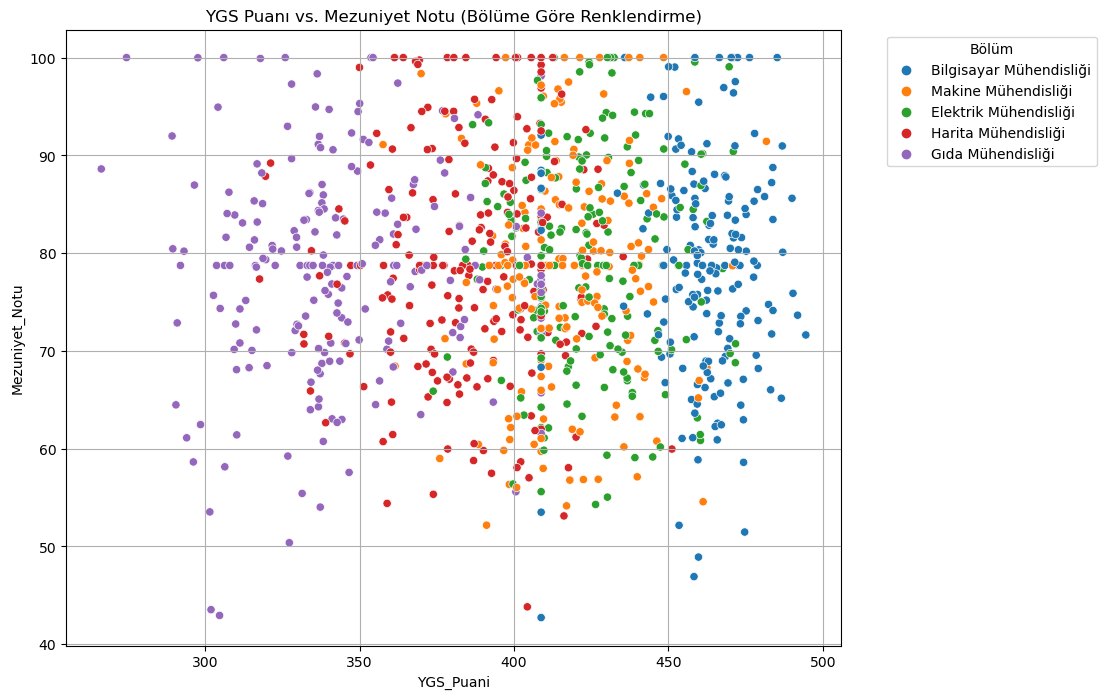

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='YGS_Puani', y='Mezuniyet_Notu', hue='Bolum', data=df) # 
plt.title('YGS Puanı vs. Mezuniyet Notu (Bölüme Göre Renklendirme)')
plt.xlabel('YGS_Puani')
plt.ylabel('Mezuniyet_Notu')
plt.legend(title='Bölüm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()